### Load the modules, classes and configs

In [1]:
import os
import torch 
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, Normalize, Resize, RandomHorizontalFlip

from sde import VPSDE
from models.unet import UNet
from loss import get_sde_loss_fn
from configs.config import CFGS
from train import Step_by_Step
from dataset import myDataset
from sampling import get_sampler 

### Setup the stochastic differential equation

In [2]:
# Define the sde
vpsde = VPSDE(N=2000)

### Setup the score model

In [3]:
# Define the models
model_config = CFGS["model"]
model = UNet(**model_config)

### Setup the loss function for the model

In [4]:
# Define the loss function
loss_fn = get_sde_loss_fn(sde=vpsde)

### Setup the optimizer

In [5]:
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=CFGS["optim"]["lr"], betas=(CFGS["optim"]["beta1"], 0.999), 
                       eps=CFGS["optim"]["eps"], weight_decay=CFGS["optim"]["weight_decay"])

### Setup the training

In [6]:
# Instantiate the step by step class
sbs = Step_by_Step(sde=vpsde, model=model, loss_fn=loss_fn, optimizer=optimizer, config=CFGS)

### Load the dataset into dataloaders

In [7]:
dataset_dir = "./datasets/retinal"
img_size = CFGS["model"]["image_size"]

transforms = Compose(
    [Resize((img_size, img_size)),
     ToTensor(),
     RandomHorizontalFlip(p=0.25),
     Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

train_dataset = myDataset(
    root_img= os.path.join(dataset_dir),
    transform=transforms
)

train_loader = DataLoader(
    train_dataset,
    batch_size=CFGS["training"]["batch_size"],
    num_workers = 4,
    pin_memory=True,
    drop_last=True,
    shuffle=True
)

In [8]:
# Set the data loaders
sbs.set_loaders(train_loader=train_loader)
#sbs.set_tensorboard("train")

In [9]:
# Load the model from the previous checkpoint
sbs.load_checkpoint("./checkpoints/checkpoint.pth")

In [10]:
sbs.train(2001)

Train Epoch: 245: 100%|██████████| 5/5 [00:01<00:00,  3.68batch/s]


Train Epoch: 251: 100%|██████████| 5/5 [00:01<00:00,  3.76batch/s]


Epochs Completed: 251
Current Time: 01:13:16


Train Epoch: 495: 100%|██████████| 5/5 [00:01<00:00,  3.61batch/s]


Train Epoch: 501: 100%|██████████| 5/5 [00:01<00:00,  3.45batch/s]


Epochs Completed: 501
Current Time: 01:19:09


Train Epoch: 745: 100%|██████████| 5/5 [00:01<00:00,  3.63batch/s]


Train Epoch: 751: 100%|██████████| 5/5 [00:01<00:00,  3.66batch/s]


Epochs Completed: 751
Current Time: 01:25:03


Train Epoch: 995: 100%|██████████| 5/5 [00:01<00:00,  3.64batch/s]


Train Epoch: 1001: 100%|██████████| 5/5 [00:01<00:00,  3.52batch/s]


Epochs Completed: 1001
Current Time: 01:30:58


Train Epoch: 1241: 100%|██████████| 5/5 [00:01<00:00,  3.54batch/s]


Train Epoch: 1251: 100%|██████████| 5/5 [00:01<00:00,  3.65batch/s]


Epochs Completed: 1251
Current Time: 01:37:01


Train Epoch: 1491: 100%|██████████| 5/5 [00:01<00:00,  3.69batch/s]


Train Epoch: 1501: 100%|██████████| 5/5 [00:01<00:00,  3.48batch/s]


Epochs Completed: 1501
Current Time: 01:42:54


Train Epoch: 1741: 100%|██████████| 5/5 [00:01<00:00,  3.60batch/s]


Train Epoch: 1751: 100%|██████████| 5/5 [00:01<00:00,  3.61batch/s]


Epochs Completed: 1751
Current Time: 01:48:50


Train Epoch: 1991: 100%|██████████| 5/5 [00:01<00:00,  3.45batch/s]


Train Epoch: 2001: 100%|██████████| 5/5 [00:01<00:00,  3.73batch/s]


Epochs Completed: 2001
Current Time: 01:54:42


In [11]:
sbs.train(5001)

Train Epoch: 2241: 100%|██████████| 5/5 [00:01<00:00,  3.62batch/s]


Train Epoch: 2251: 100%|██████████| 5/5 [00:01<00:00,  3.64batch/s]


Epochs Completed: 2251
Current Time: 02:00:40


Train Epoch: 2491: 100%|██████████| 5/5 [00:01<00:00,  3.43batch/s]


Train Epoch: 2501: 100%|██████████| 5/5 [00:01<00:00,  3.62batch/s]


Epochs Completed: 2501
Current Time: 02:06:41


Train Epoch: 2741: 100%|██████████| 5/5 [00:01<00:00,  3.69batch/s]


Train Epoch: 2751: 100%|██████████| 5/5 [00:01<00:00,  3.47batch/s]


Epochs Completed: 2751
Current Time: 02:12:36


Train Epoch: 2991: 100%|██████████| 5/5 [00:01<00:00,  3.74batch/s]


Train Epoch: 3001: 100%|██████████| 5/5 [00:01<00:00,  3.67batch/s]


Epochs Completed: 3001
Current Time: 02:18:29


Train Epoch: 3241: 100%|██████████| 5/5 [00:01<00:00,  3.63batch/s]


Train Epoch: 3251: 100%|██████████| 5/5 [00:01<00:00,  3.38batch/s]


Epochs Completed: 3251
Current Time: 02:24:23


Train Epoch: 3491: 100%|██████████| 5/5 [00:01<00:00,  3.64batch/s]


Train Epoch: 3501: 100%|██████████| 5/5 [00:01<00:00,  3.47batch/s]


Epochs Completed: 3501
Current Time: 02:30:16


Train Epoch: 3741: 100%|██████████| 5/5 [00:01<00:00,  3.69batch/s]


Train Epoch: 3751: 100%|██████████| 5/5 [00:01<00:00,  3.38batch/s]


Epochs Completed: 3751
Current Time: 02:36:08


Train Epoch: 3991: 100%|██████████| 5/5 [00:01<00:00,  3.42batch/s]


Train Epoch: 4001: 100%|██████████| 5/5 [00:01<00:00,  3.74batch/s]


Epochs Completed: 4001
Current Time: 02:42:02


Train Epoch: 4241: 100%|██████████| 5/5 [00:01<00:00,  3.72batch/s]


Train Epoch: 4251: 100%|██████████| 5/5 [00:01<00:00,  3.56batch/s]


Epochs Completed: 4251
Current Time: 02:48:00


Train Epoch: 4491: 100%|██████████| 5/5 [00:01<00:00,  3.68batch/s]


Train Epoch: 4501: 100%|██████████| 5/5 [00:01<00:00,  3.31batch/s]


Epochs Completed: 4501
Current Time: 02:53:54


Train Epoch: 4741: 100%|██████████| 5/5 [00:01<00:00,  3.65batch/s]


Train Epoch: 4751: 100%|██████████| 5/5 [00:01<00:00,  3.59batch/s]


Epochs Completed: 4751
Current Time: 02:59:51


Train Epoch: 4991: 100%|██████████| 5/5 [00:01<00:00,  3.52batch/s]


Train Epoch: 5001: 100%|██████████| 5/5 [00:01<00:00,  3.48batch/s]


Epochs Completed: 5001
Current Time: 03:05:44


In [12]:
sbs.train(10001)

Train Epoch: 5241: 100%|██████████| 5/5 [00:01<00:00,  3.69batch/s]


Train Epoch: 5251: 100%|██████████| 5/5 [00:01<00:00,  3.69batch/s]


Epochs Completed: 5251
Current Time: 03:11:43


Train Epoch: 5491: 100%|██████████| 5/5 [00:01<00:00,  3.67batch/s]


Train Epoch: 5501: 100%|██████████| 5/5 [00:01<00:00,  3.49batch/s]


Epochs Completed: 5501
Current Time: 03:17:37


Train Epoch: 5741: 100%|██████████| 5/5 [00:01<00:00,  3.52batch/s]


Train Epoch: 5751: 100%|██████████| 5/5 [00:01<00:00,  3.63batch/s]


Epochs Completed: 5751
Current Time: 03:23:34


Train Epoch: 5991: 100%|██████████| 5/5 [00:01<00:00,  3.54batch/s]


Train Epoch: 6001: 100%|██████████| 5/5 [00:01<00:00,  3.65batch/s]


Epochs Completed: 6001
Current Time: 03:29:30


Train Epoch: 6241: 100%|██████████| 5/5 [00:01<00:00,  3.52batch/s]


Train Epoch: 6251: 100%|██████████| 5/5 [00:01<00:00,  3.54batch/s]


Epochs Completed: 6251
Current Time: 03:35:24


Train Epoch: 6491: 100%|██████████| 5/5 [00:01<00:00,  3.29batch/s]


Train Epoch: 6501: 100%|██████████| 5/5 [00:01<00:00,  3.62batch/s]


Epochs Completed: 6501
Current Time: 03:41:18


Train Epoch: 6741: 100%|██████████| 5/5 [00:01<00:00,  3.66batch/s]


Train Epoch: 6751: 100%|██████████| 5/5 [00:01<00:00,  3.53batch/s]


Epochs Completed: 6751
Current Time: 03:47:16


Train Epoch: 6991: 100%|██████████| 5/5 [00:01<00:00,  3.43batch/s]


Train Epoch: 7001: 100%|██████████| 5/5 [00:01<00:00,  3.63batch/s]


Epochs Completed: 7001
Current Time: 03:53:09


Train Epoch: 7241: 100%|██████████| 5/5 [00:01<00:00,  3.62batch/s]


Train Epoch: 7251: 100%|██████████| 5/5 [00:01<00:00,  3.41batch/s]


Epochs Completed: 7251
Current Time: 03:59:07


Train Epoch: 7491: 100%|██████████| 5/5 [00:01<00:00,  3.46batch/s]


Train Epoch: 7501: 100%|██████████| 5/5 [00:01<00:00,  3.63batch/s]


Epochs Completed: 7501
Current Time: 04:04:59


Train Epoch: 7741: 100%|██████████| 5/5 [00:01<00:00,  3.54batch/s]


Train Epoch: 7751: 100%|██████████| 5/5 [00:01<00:00,  3.31batch/s]


Epochs Completed: 7751
Current Time: 04:10:56


Train Epoch: 7991: 100%|██████████| 5/5 [00:01<00:00,  3.64batch/s]


Train Epoch: 8001: 100%|██████████| 5/5 [00:01<00:00,  3.48batch/s]


Epochs Completed: 8001
Current Time: 04:16:51


Train Epoch: 8241: 100%|██████████| 5/5 [00:01<00:00,  3.42batch/s]


Train Epoch: 8251: 100%|██████████| 5/5 [00:01<00:00,  3.58batch/s]


Epochs Completed: 8251
Current Time: 04:22:44


Train Epoch: 8491: 100%|██████████| 5/5 [00:01<00:00,  3.65batch/s]


Train Epoch: 8501: 100%|██████████| 5/5 [00:01<00:00,  3.76batch/s]


Epochs Completed: 8501
Current Time: 04:28:38


Train Epoch: 8741: 100%|██████████| 5/5 [00:01<00:00,  3.49batch/s]


Train Epoch: 8751: 100%|██████████| 5/5 [00:01<00:00,  3.54batch/s]


Epochs Completed: 8751
Current Time: 04:34:31


Train Epoch: 8991: 100%|██████████| 5/5 [00:01<00:00,  3.71batch/s]


Train Epoch: 9001: 100%|██████████| 5/5 [00:01<00:00,  3.48batch/s]


Epochs Completed: 9001
Current Time: 04:40:25


Train Epoch: 9241: 100%|██████████| 5/5 [00:01<00:00,  3.42batch/s]


Train Epoch: 9251: 100%|██████████| 5/5 [00:01<00:00,  3.70batch/s]


Epochs Completed: 9251
Current Time: 04:46:22


Train Epoch: 9491: 100%|██████████| 5/5 [00:01<00:00,  3.66batch/s]


Train Epoch: 9501: 100%|██████████| 5/5 [00:01<00:00,  3.38batch/s]


Epochs Completed: 9501
Current Time: 04:52:15


Train Epoch: 9741: 100%|██████████| 5/5 [00:01<00:00,  3.45batch/s]


Train Epoch: 9751: 100%|██████████| 5/5 [00:01<00:00,  3.66batch/s]


Epochs Completed: 9751
Current Time: 04:58:11


Train Epoch: 9991: 100%|██████████| 5/5 [00:01<00:00,  3.51batch/s]


Train Epoch: 10001: 100%|██████████| 5/5 [00:01<00:00,  3.66batch/s]


Epochs Completed: 10001
Current Time: 05:04:04


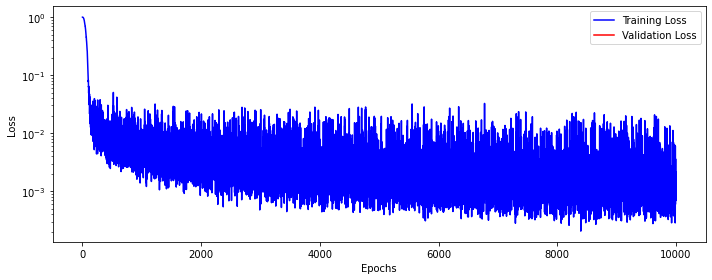

In [10]:
sbs.plot_losses()

In [11]:
sbs.total_epochs

10001

In [12]:
img = next(iter(train_loader))

In [13]:
img.shape

torch.Size([8, 3, 128, 128])

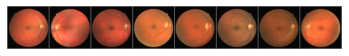

In [14]:
sbs.plot_samples(img)

In [17]:
from sampling import get_sampler 

shape = torch.Size([4, 3, 128, 128])

em_sampler = get_sampler(sde=vpsde, shape=shape)
samples = em_sampler(model)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


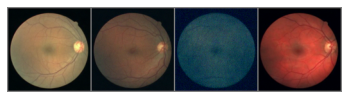

In [18]:
sbs.plot_samples(samples.detach().cpu())